In [1]:
# Import Required Libraries
import numpy as np
import math
import matplotlib.pyplot as plt
from IPython.display import clear_output

%matplotlib inline

In [2]:
# A general linear function
def Func(x, w, b):
    return (w * x) + b

# Computing the cost of a particular fit with parameters w, b
def ComputeCost(w, b):
    err = np.dot(Func(xData, w, b) - yData, Func(xData, w, b) - yData)
    err = err / (2 * n)
    return err

# Gradient of Cost with respect to w
def ComputeGradientW(w, b):
    grad = np.dot(Func(xData, w, b) - yData, xData)
    grad = grad / (2 * n)
    return grad

# Gradient of cost with respect to b    
def ComputeGradientB(w, b):
    uni = []
    for i in range(n):
        uni.append(1)
    grad = np.dot(Func(xData, w, b) - yData, np.array(uni))
    grad = grad / (2 * n)
    return grad

In [3]:
# Function to perform Gradient Descent

def GradientDescent(percErr):
    w = 1
    b = 1
    i = 0
    while 1:
        i += 1
        j = ComputeCost(w, b)
        w1 = w - (a_w * ComputeGradientW(w, b))
        b1 = b - (a_b * ComputeGradientB(w, b))
        w = w1
        b = b1
        j1 = ComputeCost(w, b)
        percChange = (j - j1) / (100 * j)
        if i % 20 == 1:
            # Print % change every 10th iteration - increase number to avoid message flooding
            clear_output(wait=False)
            print(percChange)
        if percChange < percErr:
            break
    print(w, b)
    return w, b

In [4]:
# Settings
n = 50            # Number of data points

m = 0.3           # Slope of generator line
c = 15            # offset of generator line
var = 2.5         # Variance of data from generator line

xLims = (0, 100)  # Lowest and highest data point's x value

percSat = 1e-12    # Stop learning when percentage change between consecutive updates goes lesser than this
a_w = 5e-4         # Learning rate. Optionally have different rates for W and B
a_b = a_w#5e-2

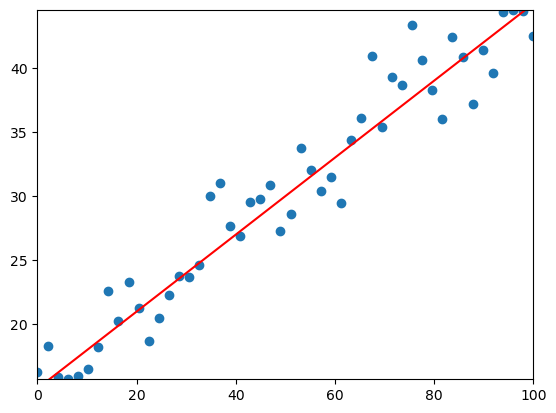

Actual w =  0.3 Actual b =  15


In [5]:
# Generate random data
GEN = np.random.default_rng(seed = None)
ydevs = var * GEN.standard_normal(size = n, dtype = np.float32)
xData = np.linspace(xLims[0], xLims[1], num = n, endpoint = True, dtype = np.float32)
yData = np.array([Func(ele, m, c) for ele in xData], dtype = np.float32)
yData = yData + ydevs

# Plot generated data (blue) and Generator Line (red)
plt.scatter(xData, yData)
plt.xlim(min(xData), max(xData))
plt.ylim(min(yData), max(yData))
plt.axline((0, c), slope=m, color='red')
plt.show()

print("Actual w = ", m, "Actual b = ", c)


4.520784420308751e-09
0.2993640090942341 15.283760279118818
Actual w =  0.3 Actual b =  15
Cost of original line:  2.7565704345703126 ; Cost of fit:  2.7001904296875


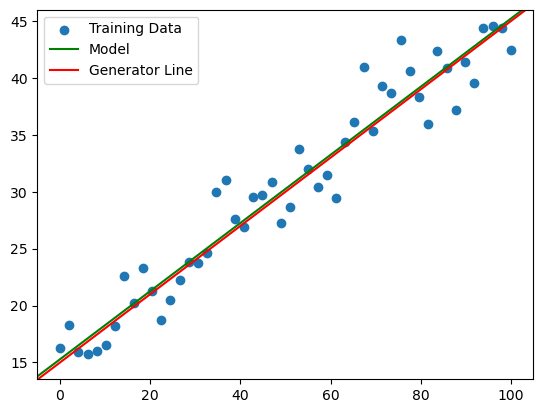

In [6]:
# Perform Gradient Descent
w, b = GradientDescent(percSat)
print("Actual w = ", m, "Actual b = ", c)

# Plot fitted line in green, Generator line in red and points in blue.
print("Cost of original line: ", ComputeCost(m, c), "; Cost of fit: ", ComputeCost(w, b))
plt.scatter(xData, yData)
plt.axline((0, b), slope=w, c='g')
plt.axline((0, c), slope=m, color='red')
plt.legend(['Training Data', 'Model', 'Generator Line'])
plt.show()